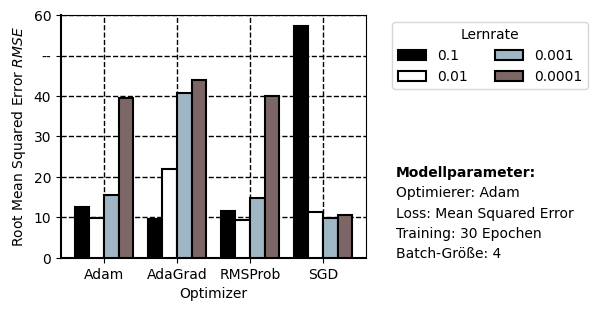

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

### Data
df = pd.read_csv('optimizer_scan.csv')

df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.adam.Adam'>", 'Adam')
df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.adagrad.Adagrad'>", 'AdaGrad')
df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.rmsprop.RMSprop'>", 'RMSProb')
df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.sgd.SGD'>", 'SGD')
df['lossfunc'] = df['lossfunc'].replace('MeanAbsoluteError', 'MAE')
df['lossfunc'] = df['lossfunc'].replace('MeanSquaredError', 'MSE')

filtered = df.query("lossfunc == 'MSE' and lr < 1")
metrics = ['mean_squared_error', 'mean_absolute_error']

### Plot

fig = plt.figure(figsize=(10/2.54, 8/2.54))

learning_rate = ['0.1', '0.01', '0.001', '0.0001']
x_label = ['Adam','AdaGrad', 'RMSProb', 'SGD']

x = np.arange(len(x_label))  # the label locations
width = 0.2  # the width of the bars
multiplier = -1.5

color1 = (0, 0, 0)
color2 = (1, 1, 1)
color3 = (159/255, 182/255, 196/255)
color4 = (125/255, 102/255, 102/255)
color5 = (153/255, 0, 0)

colors =  [color1, color2, color3, color4]

for rate, color in zip(learning_rate, colors):
    df = filtered.query('lr == ' + rate)
    offset = width * multiplier
    rects = plt.bar(x + offset, df['root_mean_squared_error'], width, label=str(rate), color=color, edgecolor='black', linewidth=1.5, zorder=3)
    multiplier += 1

plt.legend(title='Lernrate', loc='upper right', ncol=2, bbox_to_anchor=(1.75, 1.0))

plt.ylabel('Root Mean Squared Error $RMSE$')
plt.xlabel('Optimizer')
plt.grid(True, linestyle='--',color='k', linewidth=1, zorder=0)


# Axis settings
ax = plt.gca()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.set_ylim(bottom=0, top=20)

# Einheiten auf y-Achse
yunit = '--'
ticks = list(range(0, 61, 10))
ticks = [int(tick) for tick in ticks]
ticks_with_units = [yunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks_with_units)

ax.set_xticks(x)
ax.set_xticklabels(x_label)

plt.grid(axis='y', linewidth=1.0)

x = 4
plt.text(x, 20, s='Modellparameter:', fontsize=10, fontweight='bold')
plt.text(x, 15, s='Optimierer: Adam', fontsize=10)
plt.text(x, 10, s='Loss: Mean Squared Error', fontsize=10)
plt.text(x, 5, s='Training: 30 Epochen', fontsize=10)
plt.text(x, 0, s='Batch-Größe: 4', fontsize=10)

plt.savefig('optimizer_selection.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()

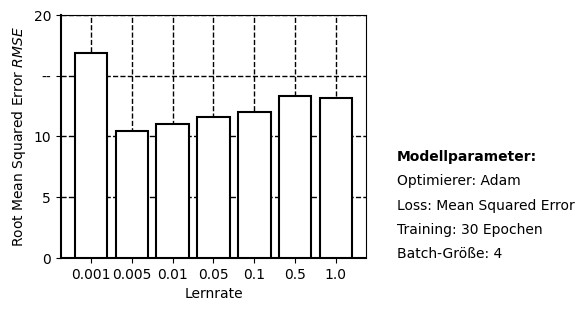

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

### Data
df = pd.read_csv('learning_rate.csv')
filtered = df

### Plot

fig = plt.figure(figsize=(10/2.54, 8/2.54))

lr = [str(tick) for tick in filtered['lr']]

plt.bar(lr, filtered['root_mean_squared_error'], color='white', edgecolor='black', linewidth=1.5, zorder=3)
plt.ylabel('Root Mean Squared Error $RMSE$')
plt.xlabel('Lernrate')
plt.grid(True, linestyle='--',color='k', linewidth=1, zorder=0)


# Axis settings
ax = plt.gca()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.set_ylim(bottom=0, top=20)

# Einheiten auf y-Achse
yunit = '--'
ticks = list(range(0, 21, 5))
ticks = [int(tick) for tick in ticks]
ticks_with_units = [yunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks_with_units)

plt.grid(True, linewidth=1.0)
x = 7.5
plt.text(x, 8, s='Modellparameter:', fontsize=10, fontweight='bold')
plt.text(x, 6, s='Optimierer: Adam', fontsize=10)
plt.text(x, 4, s='Loss: Mean Squared Error', fontsize=10)
plt.text(x, 2, s='Training: 30 Epochen', fontsize=10)
plt.text(x, 0, s='Batch-Größe: 4', fontsize=10)



plt.savefig('learning_rate.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()